# Data Science T5 MTA EDA Project

![TLC logo](https://user-images.githubusercontent.com/87195262/134807871-6389592c-65f6-4fda-81be-86e3923bf1d9.png)

## Needed Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy import inspect

## MTA Data Analysis

### 1. Load data from MTA website

In [4]:
#initialise the number of weeks for the dataset
num_weeks = 12

#initialise the date for the first week of the dataset (week ending on start_date)
start_date = filedate = pd.Timestamp('2019-10-12 00:00:00')

#initialise the regex for the MTA turnstile url
filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"

filelist = []

for numfiles in range (num_weeks):

    # create the appropriate filename for the week
    filedate_str = str(filedate.year)[2:4] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)

    # read the file and append it to the list of files to be concacated
    df = pd.read_csv(filename, keep_date_col=True)
    filelist.append(df)

    # advance to the next week
    filedate += pd.Timedelta(days=7)

mta_test = pd.concat(filelist, axis=0, ignore_index=True)

### 2. Connect to sqlalchemy engine and store database

In [5]:
engine = create_engine("sqlite:///MTA_data.db")
mta_test.to_sql("MTA_data",engine, if_exists='replace', index = False)

#### Check database tables

In [27]:
all_tables = inspect(engine).get_table_names()
print(all_tables)

['MTA_data']


### 2. Preveiw data

In [28]:
mta_data = pd.read_sql('SELECT * FROM MTA_data;', engine) # Reading table from sql database
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,00:00:00,REGULAR,7224009,2447060
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,04:00:00,REGULAR,7224019,2447067
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,08:00:00,REGULAR,7224033,2447074
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,12:00:00,REGULAR,7224095,2447082
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,16:00:00,REGULAR,7224095,2447082


In [29]:
mta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2474417 entries, 0 to 2474416
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                          

In [30]:
mta_data.describe()

,ENTRIES,EXITS
count,2.474417e+06,2.474417e+06
mean,4.173024e+07,3.420674e+07
std,2.144032e+08,1.965842e+08
min,0.000000e+00,0.000000e+00
25%,3.106830e+05,1.438140e+05
50%,1.981168e+06,1.169443e+06
75%,6.638394e+06,4.542663e+06
max,2.129051e+09,2.123717e+09


### 3. Data cleaning and preprocessing

#### 3.1 Check nulls

In [31]:
#checking the null values
mta_data.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

#### 3.2 Strip columns names

In [32]:
#checking columns names
mta_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [33]:
# fix the columns names
mta_data.columns = [column.strip() for column in mta_data.columns]
mta_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

#### 3.3 Concat Data and Time columns into a new datatime column

In [34]:
mta_data["DATE_TIME"] = pd.to_datetime(mta_data.DATE + " " + mta_data.TIME)
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,00:00:00,REGULAR,7224009,2447060,2019-10-05 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,04:00:00,REGULAR,7224019,2447067,2019-10-05 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,08:00:00,REGULAR,7224033,2447074,2019-10-05 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,12:00:00,REGULAR,7224095,2447082,2019-10-05 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,16:00:00,REGULAR,7224095,2447082,2019-10-05 16:00:00


#### 3.4 Check duplicates

In [35]:
# checking duplicates
(mta_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME","DIVISION"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,DIVISION,EXITS
2030973,R285,R308,00-00-00,MT EDEN AV,2019-11-04 15:00:00,IRT,2
2030959,R285,R308,00-00-00,MT EDEN AV,2019-11-02 08:00:00,IRT,2
2225993,R514,R094,00-05-00,ASTORIA BLVD,2019-12-24 19:00:00,BMT,2
2225737,R514,R094,00-03-00,ASTORIA BLVD,2019-12-17 03:00:00,BMT,2
2225738,R514,R094,00-03-00,ASTORIA BLVD,2019-12-17 07:00:00,BMT,2


In [36]:
# fixing duplicets
mta_data.drop_duplicates(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME","DIVISION"], inplace=True)

# checking again
(mta_data
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME","DIVISION"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,DIVISION,EXITS
0,A002,R051,02-00-00,59 ST,2019-10-05 00:00:00,BMT,1
1649555,R138,R293,00-02-02,34 ST-PENN STA,2019-12-07 09:00:00,IRT,1
1649557,R138,R293,00-02-02,34 ST-PENN STA,2019-12-07 17:00:00,IRT,1
1649558,R138,R293,00-02-02,34 ST-PENN STA,2019-12-07 21:00:00,IRT,1
1649559,R138,R293,00-02-02,34 ST-PENN STA,2019-12-08 01:00:00,IRT,1


#### 3.5 Remove unneeded columns

In [37]:
# removing unneeded columns
mta_data = mta_data.drop(["DESC"], axis=1, errors="ignore")

### 4. Calculations

#### 4.1 Create a new column PARK

In [38]:
mta_data['PARK'] = (mta_data.STATION.str.contains(' PK | PARK | PARK|PARK ')) | (
    mta_data.STATION.str.endswith(' PK'))
mta_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,PARK
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,00:00:00,7224009,2447060,2019-10-05 00:00:00,False
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,04:00:00,7224019,2447067,2019-10-05 04:00:00,False
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,08:00:00,7224033,2447074,2019-10-05 08:00:00,False
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,12:00:00,7224095,2447082,2019-10-05 12:00:00,False
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,16:00:00,7224095,2447082,2019-10-05 16:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2474412,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,04:00:00,5554,420,2019-12-27 04:00:00,False
2474413,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,08:00:00,5554,420,2019-12-27 08:00:00,False
2474414,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,12:00:00,5554,420,2019-12-27 12:00:00,False
2474415,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,16:00:00,5554,420,2019-12-27 16:00:00,False


#### 4.2 Create a new column TOTAL_EXITS

In [39]:
mta_data['TOTAL_EXITS'] = mta_data.groupby(
    ['STATION', 'UNIT', 'C/A', 'SCP','DIVISION','DATE'])['EXITS'].diff()
mta_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,PARK,TOTAL_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,00:00:00,7224009,2447060,2019-10-05 00:00:00,False,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,04:00:00,7224019,2447067,2019-10-05 04:00:00,False,7.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,08:00:00,7224033,2447074,2019-10-05 08:00:00,False,7.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,12:00:00,7224095,2447082,2019-10-05 12:00:00,False,8.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,16:00:00,7224095,2447082,2019-10-05 16:00:00,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474412,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,04:00:00,5554,420,2019-12-27 04:00:00,False,0.0
2474413,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,08:00:00,5554,420,2019-12-27 08:00:00,False,0.0
2474414,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,12:00:00,5554,420,2019-12-27 12:00:00,False,0.0
2474415,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,16:00:00,5554,420,2019-12-27 16:00:00,False,0.0


#### 4.4 Remove `TOTAL_EXITS` negative values# 

In [41]:
mta_data = mta_data[mta_data.TOTAL_EXITS >= 0]
mta_data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,PARK,TOTAL_EXITS
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,04:00:00,7224019,2447067,2019-10-05 04:00:00,False,7.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,08:00:00,7224033,2447074,2019-10-05 08:00:00,False,7.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,12:00:00,7224095,2447082,2019-10-05 12:00:00,False,8.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,16:00:00,7224095,2447082,2019-10-05 16:00:00,False,0.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,20:00:00,7224096,2447082,2019-10-05 20:00:00,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474412,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,04:00:00,5554,420,2019-12-27 04:00:00,False,0.0
2474413,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,08:00:00,5554,420,2019-12-27 08:00:00,False,0.0
2474414,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,12:00:00,5554,420,2019-12-27 12:00:00,False,0.0
2474415,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,16:00:00,5554,420,2019-12-27 16:00:00,False,0.0


/Users/rawabikhalaf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rawabikhalaf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'cumulative probability distribution of exits'}, xlabel='TOTAL_EXITS', ylabel='Density'>

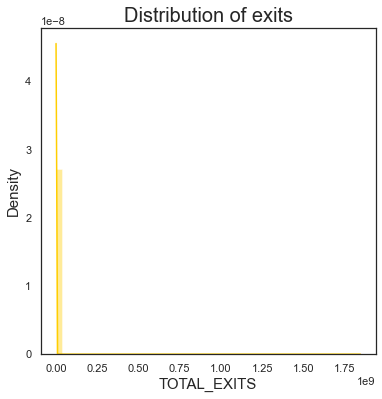

<Figure size 432x288 with 0 Axes>

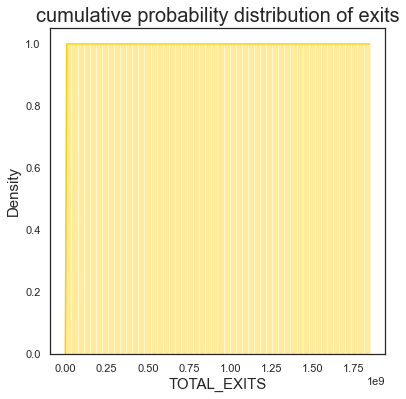

In [154]:
plt.figure(figsize=(6,6))
plt.title("Distribution of exits", fontsize=20);
plt.xlabel("Exits", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot(mta_data.TOTAL_EXITS,color='#FFCE00')
plt.figure()

plt.figure(figsize=(6,6))
plt.title("cumulative probability distribution of exits", fontsize=20);
plt.xlabel("Exits", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot( mta_data.TOTAL_EXITS,hist_kws={"cumulative":True},kde_kws={"cumulative":True},color='#FFCE00')


#### Dealing with outliers

In [43]:
y = mta_data.TOTAL_EXITS
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))

In [44]:
removed_outliers.value_counts()

True     1946976
False     102370
Name: TOTAL_EXITS, dtype: int64

In [45]:
index_names = mta_data[~removed_outliers].index
mta_data_clean = mta_data.drop(index_names, inplace=False)
mta_data_clean

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,PARK,TOTAL_EXITS
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,04:00:00,7224019,2447067,2019-10-05 04:00:00,False,7.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,08:00:00,7224033,2447074,2019-10-05 08:00:00,False,7.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,12:00:00,7224095,2447082,2019-10-05 12:00:00,False,8.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,16:00:00,7224095,2447082,2019-10-05 16:00:00,False,0.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/05/2019,20:00:00,7224096,2447082,2019-10-05 20:00:00,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474412,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,04:00:00,5554,420,2019-12-27 04:00:00,False,0.0
2474413,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,08:00:00,5554,420,2019-12-27 08:00:00,False,0.0
2474414,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,12:00:00,5554,420,2019-12-27 12:00:00,False,0.0
2474415,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/27/2019,16:00:00,5554,420,2019-12-27 16:00:00,False,0.0


/Users/rawabikhalaf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rawabikhalaf/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'cumulative probability distribution of exits'}, xlabel='TOTAL_EXITS', ylabel='Density'>

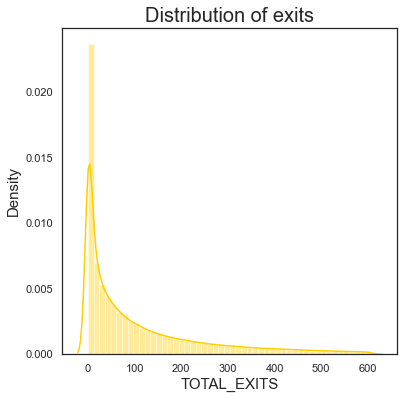

<Figure size 432x288 with 0 Axes>

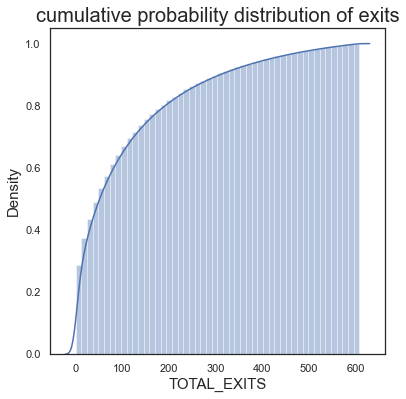

In [155]:
plt.figure(figsize=(6,6))
plt.title("Distribution of exits", fontsize=20);
plt.xlabel("Exits", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot(mta_data_clean.TOTAL_EXITS,color='#FFCE00')
plt.figure()

plt.figure(figsize=(6,6))
plt.title("cumulative probability distribution of exits", fontsize=20);
plt.xlabel("Exits", fontsize=15)
plt.ylabel("Density", fontsize=15)
sns.distplot( mta_data_clean.TOTAL_EXITS,hist_kws={"cumulative":True},kde_kws={"cumulative":True})

#### Filter the data based on stations that are near to any park

In [55]:
stations_around_parks = mta_data_clean[mta_data_clean.PARK == True]
stations_around_parks

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,PARK,TOTAL_EXITS
13539,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,05:00:00,6557665,5781951,2019-10-05 05:00:00,True,15.0
13540,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,09:00:00,6557722,5781977,2019-10-05 09:00:00,True,26.0
13541,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,13:00:00,6557832,5782046,2019-10-05 13:00:00,True,69.0
13542,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,17:00:00,6557940,5782152,2019-10-05 17:00:00,True,106.0
13543,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,21:00:00,6558041,5782281,2019-10-05 21:00:00,True,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472008,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,04:00:00,6290731,1502886,2019-12-27 04:00:00,True,3.0
2472009,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,08:00:00,6291041,1502892,2019-12-27 08:00:00,True,6.0
2472010,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,12:00:00,6291322,1502908,2019-12-27 12:00:00,True,16.0
2472011,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,16:00:00,6291502,1502951,2019-12-27 16:00:00,True,43.0


#### 4.5 Create a new column `MONTH`

In [56]:
stations_around_parks['MONTH'] = stations_around_parks['DATE_TIME'].dt.month_name()
stations_around_parks

<ipython-input-56-5b4e28ead936>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_around_parks['MONTH'] = stations_around_parks['DATE_TIME'].dt.month_name()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,PARK,TOTAL_EXITS,MONTH
13539,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,05:00:00,6557665,5781951,2019-10-05 05:00:00,True,15.0,October
13540,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,09:00:00,6557722,5781977,2019-10-05 09:00:00,True,26.0,October
13541,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,13:00:00,6557832,5782046,2019-10-05 13:00:00,True,69.0,October
13542,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,17:00:00,6557940,5782152,2019-10-05 17:00:00,True,106.0,October
13543,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,21:00:00,6558041,5782281,2019-10-05 21:00:00,True,129.0,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472008,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,04:00:00,6290731,1502886,2019-12-27 04:00:00,True,3.0,December
2472009,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,08:00:00,6291041,1502892,2019-12-27 08:00:00,True,6.0,December
2472010,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,12:00:00,6291322,1502908,2019-12-27 12:00:00,True,16.0,December
2472011,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,16:00:00,6291502,1502951,2019-12-27 16:00:00,True,43.0,December


In [85]:
stations_around_parks['MONTH_INDEX'] = stations_around_parks['DATE_TIME'].dt.month
stations_around_parks

<ipython-input-85-dc1a280e24de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_around_parks['MONTH_INDEX'] = stations_around_parks['DATE_TIME'].dt.month


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,PARK,TOTAL_EXITS,MONTH,Day,MONTH_INDEX
13539,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,05:00:00,6557665,5781951,2019-10-05 05:00:00,True,15.0,October,Saturday,10
13540,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,09:00:00,6557722,5781977,2019-10-05 09:00:00,True,26.0,October,Saturday,10
13541,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,13:00:00,6557832,5782046,2019-10-05 13:00:00,True,69.0,October,Saturday,10
13542,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,17:00:00,6557940,5782152,2019-10-05 17:00:00,True,106.0,October,Saturday,10
13543,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,21:00:00,6558041,5782281,2019-10-05 21:00:00,True,129.0,October,Saturday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472008,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,04:00:00,6290731,1502886,2019-12-27 04:00:00,True,3.0,December,Friday,12
2472009,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,08:00:00,6291041,1502892,2019-12-27 08:00:00,True,6.0,December,Friday,12
2472010,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,12:00:00,6291322,1502908,2019-12-27 12:00:00,True,16.0,December,Friday,12
2472011,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,16:00:00,6291502,1502951,2019-12-27 16:00:00,True,43.0,December,Friday,12


In [57]:
stations_around_parks['Day'] = stations_around_parks['DATE_TIME'].dt.day_name()

<ipython-input-57-40c94c70cbf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_around_parks['Day'] = stations_around_parks['DATE_TIME'].dt.day_name()


### Calculate the average total number of Exits per Station

In [121]:
stations_parks = stations_around_parks.groupby(['STATION']).TOTAL_EXITS.mean().reset_index()
stations_parks.sort_values(ascending=False,by='TOTAL_EXITS',inplace=True)

In [76]:
stations_around_parks

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,PARK,TOTAL_EXITS,MONTH,Day
13539,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,05:00:00,6557665,5781951,2019-10-05 05:00:00,True,15.0,October,Saturday
13540,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,09:00:00,6557722,5781977,2019-10-05 09:00:00,True,26.0,October,Saturday
13541,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,13:00:00,6557832,5782046,2019-10-05 13:00:00,True,69.0,October,Saturday
13542,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,17:00:00,6557940,5782152,2019-10-05 17:00:00,True,106.0,October,Saturday
13543,B009,R411,00-00-00,PARK PLACE,S,BMT,10/05/2019,21:00:00,6558041,5782281,2019-10-05 21:00:00,True,129.0,October,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472008,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,04:00:00,6290731,1502886,2019-12-27 04:00:00,True,3.0,December,Friday
2472009,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,08:00:00,6291041,1502892,2019-12-27 08:00:00,True,6.0,December,Friday
2472010,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,12:00:00,6291322,1502908,2019-12-27 12:00:00,True,16.0,December,Friday
2472011,R726,R329,00-00-02,MORRIS PARK,5,IRT,12/27/2019,16:00:00,6291502,1502951,2019-12-27 16:00:00,True,43.0,December,Friday


In [93]:
stations_parks_month = stations_around_parks.groupby(['STATION','MONTH','MONTH_INDEX']).TOTAL_EXITS.mean().reset_index()
stations_parks_month

,STATION,MONTH,MONTH_INDEX,TOTAL_EXITS
0,42 ST-BRYANT PK,December,12,191.956503
1,42 ST-BRYANT PK,November,11,185.403795
2,42 ST-BRYANT PK,October,10,194.549550
3,63 DR-REGO PARK,December,12,66.018692
4,63 DR-REGO PARK,November,11,63.627816
5,63 DR-REGO PARK,October,10,59.132939
6,85 ST-FOREST PK,December,12,72.920223
7,85 ST-FOREST PK,November,11,77.218543
8,85 ST-FOREST PK,October,10,66.769643
9,BEDFORD PK BLVD,December,12,92.078947


### Calculate the total number of Exits per Day

In [66]:
mta_day_exits = stations_around_parks.groupby(['Day']).agg({"TOTAL_EXITS": "mean"}).reset_index()
mta_day_exits

,Day,TOTAL_EXITS
0,Friday,117.404214
1,Monday,115.676820
2,Saturday,82.927595
3,Sunday,67.264250
4,Thursday,114.254108
5,Tuesday,117.553629
6,Wednesday,114.823549


In [146]:
mta_day_exits.describe()

,TOTAL_EXITS
count,7.000000
mean,2369.558815
std,5867.619100
min,74.024368
25%,165.727505
50%,166.237692
75%,169.680586
max,15675.833462


### Visualization

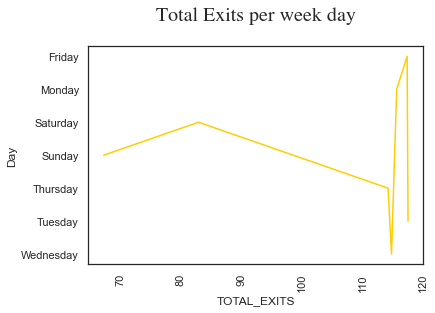

In [151]:
sns.set_theme(context='notebook',style='white')
plt.title("Total Exits per week day\n",size=20,family="Times")
sns.lineplot(palette = sns.color_palette("YlGnBu", 3),
             data = mta_day_exits,
             x='TOTAL_EXITS',
             y='Day',color='#FFCE00')

plt.xticks(rotation=90);

/Users/rawabikhalaf/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


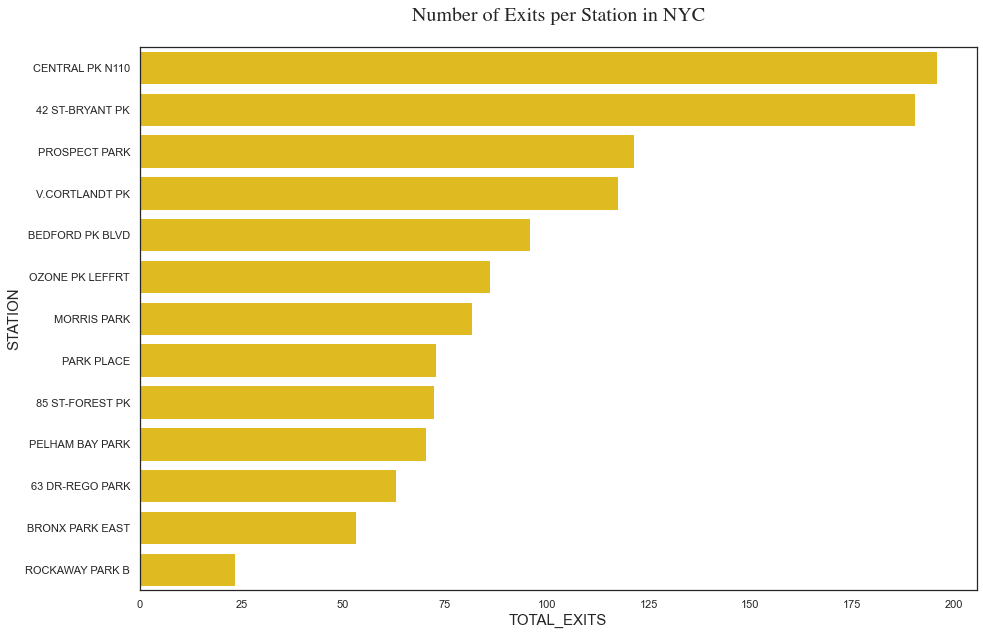

In [150]:
y = stations_parks.STATION
x = stations_parks.TOTAL_EXITS

plt.figure(figsize=(15,10))
sns.set_theme(context='notebook', style='white')

plt.xlabel('Stations',size = 15)
plt.ylabel('Number of Exits', size = 15)

plt.title("Number of Exits per Station in NYC\n", size=20, family='Times')

sns.barplot(x,y,color='#FFCE00');

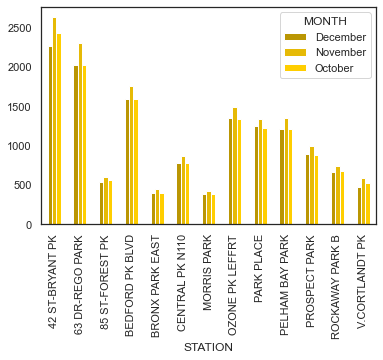

In [149]:
stations_around_parks.groupby(['STATION','MONTH']).size().unstack().plot(
    kind='bar',stacked=False,color=['#BA9603','#E6BA06','#FFCE00'])
plt.show()